<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [72]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import math

In [73]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15) 

In [74]:
X

array([[ 0.35375589,  0.28929301,  0.48523022,  0.62203148, -1.24936153],
       [ 0.20425535,  1.60431078, -0.065753  , -0.00474915,  1.54888018],
       [-1.29765409, -0.5344866 ,  0.23614881,  0.27004474, -1.17486639],
       ...,
       [-0.04510433,  0.60958112, -0.0476168 , -0.03016537,  0.65812123],
       [-0.16984873,  0.0415595 ,  0.23741361,  0.29950873, -0.69521718],
       [ 1.29596578,  0.89516891, -0.14080382, -0.13311413,  1.18441842]])

In [75]:
y

array([0, 1, 0, ..., 1, 0, 1])

In [76]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
x_tr,x_cv,y_tr,y_cv = train_test_split(x_train,y_train, test_size = 0.25,random_state=27)

In [77]:
clf = SVC(C=100,gamma=0.001)
clf.fit(x_tr,y_tr)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
fcv = clf.decision_function(x_cv) #for every point in cv dataset, it returns whether they fall on +ve or -ve side
print(fcv)                        #high +ve value - positive side, high -ve value - negative side

[ 3.59690158 -4.51137455  1.58570872  1.16096549 -2.17884933  0.33394161
 -2.76745942  1.50039348  0.48458057  1.66518524  1.66545115  0.42279444
 -3.05688457 -2.33385232 -2.42056855 -2.36413743 -1.21144437  2.1805468
 -2.98097108 -1.58429009 -2.79593627  2.48153556 -0.55265244 -0.86277337
 -0.65008641 -2.57323423  1.57965601 -2.32436796 -2.36796297  1.30107135
 -1.17886192 -3.08335511  0.89551492 -3.51959495 -2.98430506  0.22622302
 -3.14217626 -2.769456   -1.52002663 -3.46932477  1.43463549 -2.37606877
  0.81279851 -0.80260725 -0.33792479 -1.45768481 -1.00461548 -2.13803754
 -1.26603918 -2.23022068 -1.8392781  -1.60206159 -0.15187998 -3.56915784
 -0.88147454 -2.47212701  1.87844609 -1.6367721   1.7851031  -2.5933846
  1.54513151  1.61119073  1.45594854  0.29916345 -2.18219511  3.08048772
 -2.30079777 -1.66704318 -1.08634721 -4.03389628  3.7855477   1.77429896
 -0.53468406 -1.78320739 -1.36209197 -5.30675356  0.18880928  3.09700937
 -1.58826231 -2.94839196  1.71269532 -2.63423918 -3.7

 -2.26210225 -4.09591712 -2.10566062 -4.02095654]


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [79]:
#to implement we want support vector points
#coefficient of support vectors
#gamma
#intercept

gamma = clf.gamma
intercept = clf.intercept_
alpha_i = clf.dual_coef_[0]
x_i = clf.support_vectors_



In [80]:
def decision_function(x_cv,gamma,intercept,alpha_i,x_i):
    y_pred=[]
    for x_q in x_cv:
        sum_ = 0
        for index in range(0, len(x_i)):
            kernel = np.exp(-gamma * (np.linalg.norm(x_i[index]-x_q))**2) #numpy.linalg.norm can be used to compute euclidean distance
            sum_ = alpha_i[index] * kernel + sum_
        y_pred.append(sum_ + intercept)
    return np.array(y_pred)

In [81]:
fcv_computed = decision_function(x_cv,gamma,intercept,alpha_i,x_i)
print(fcv_computed.ravel()[0:6])
print(fcv[0:6])

[ 3.59690158 -4.51137455  1.58570872  1.16096549 -2.17884933  0.33394161]
[ 3.59690158 -4.51137455  1.58570872  1.16096549 -2.17884933  0.33394161]


In [82]:
fcv_computed = fcv_computed.ravel()

In [83]:
fcv_computed

array([ 3.59690158, -4.51137455,  1.58570872,  1.16096549, -2.17884933,
        0.33394161, -2.76745942,  1.50039348,  0.48458057,  1.66518524,
        1.66545115,  0.42279444, -3.05688457, -2.33385232, -2.42056855,
       -2.36413743, -1.21144437,  2.1805468 , -2.98097108, -1.58429009,
       -2.79593627,  2.48153556, -0.55265244, -0.86277337, -0.65008641,
       -2.57323423,  1.57965601, -2.32436796, -2.36796297,  1.30107135,
       -1.17886192, -3.08335511,  0.89551492, -3.51959495, -2.98430506,
        0.22622302, -3.14217626, -2.769456  , -1.52002663, -3.46932477,
        1.43463549, -2.37606877,  0.81279851, -0.80260725, -0.33792479,
       -1.45768481, -1.00461548, -2.13803754, -1.26603918, -2.23022068,
       -1.8392781 , -1.60206159, -0.15187998, -3.56915784, -0.88147454,
       -2.47212701,  1.87844609, -1.6367721 ,  1.7851031 , -2.5933846 ,
        1.54513151,  1.61119073,  1.45594854,  0.29916345, -2.18219511,
        3.08048772, -2.30079777, -1.66704318, -1.08634721, -4.03

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [84]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    b=0

    return w,b

In [85]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid =  1/(1+np.exp(-z))

    return sigmoid

In [86]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    s = 0
    n = len(y_true)
    for i in range(0,n):
      s = s + ( (y_true[i]*np.log10(y_pred[i])) + (1-y_true[i])*np.log10(1-y_pred[i]) )
    loss = -1 * (1/n)*s

    return loss

In [87]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''

    dw =x*(y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w.T)/N)
    return dw

In [88]:
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db = y - sigmoid(np.dot(w.T,x)+b)
     return db

In [89]:
from tqdm import tqdm
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    w,b = initialize_weights(X_train[0])
    tr_loss=[]
    te_loss=[]
    for epoch in tqdm(range(epochs)):
      for i in range(0,len(X_train)):
        w = w + eta0*gradient_dw(X_train[i],y_train[i],w,b,alpha,len(X_train))
        b = b + eta0*gradient_db(X_train[i],y_train[i],w,b)
      y_pred =[]
      for index in range(len(X_train)):
            y_pred.append(sigmoid(np.dot(w, X_train[index]) + b))
      tr_loss.append(logloss(y_train,y_pred))
      y_pred =[]
      for index in range(len(X_test)):
            y_pred.append(sigmoid(np.dot(w, X_test[index]) + b))
      te_loss.append(logloss(y_test,y_pred))



    return w,b,tr_loss,te_loss

In [90]:
positive_points_cnt = len(y_train[y_train==1])
negative_points_cnt = len(y_train[y_train==0])
y_plus = (positive_points_cnt + 1) / (positive_points_cnt + 2)
y_minus = 1/(negative_points_cnt+2)
y_cv_upd = []
for i in range(0,len(y_cv)):
    if y_cv[i]==0:
        y_cv_upd.append(y_plus)
    else:
        y_cv_upd.append(y_minus)

In [91]:
y_cv_upd = np.array(y_cv_upd)

In [92]:
y_cv_upd

array([3.60100828e-04, 9.99185004e-01, 3.60100828e-04, 3.60100828e-04,
       9.99185004e-01, 9.99185004e-01, 9.99185004e-01, 3.60100828e-04,
       9.99185004e-01, 3.60100828e-04, 3.60100828e-04, 9.99185004e-01,
       9.99185004e-01, 9.99185004e-01, 9.99185004e-01, 9.99185004e-01,
       9.99185004e-01, 3.60100828e-04, 9.99185004e-01, 9.99185004e-01,
       9.99185004e-01, 3.60100828e-04, 3.60100828e-04, 9.99185004e-01,
       3.60100828e-04, 9.99185004e-01, 3.60100828e-04, 9.99185004e-01,
       9.99185004e-01, 3.60100828e-04, 9.99185004e-01, 9.99185004e-01,
       3.60100828e-04, 9.99185004e-01, 3.60100828e-04, 9.99185004e-01,
       9.99185004e-01, 9.99185004e-01, 9.99185004e-01, 9.99185004e-01,
       3.60100828e-04, 9.99185004e-01, 3.60100828e-04, 9.99185004e-01,
       9.99185004e-01, 9.99185004e-01, 9.99185004e-01, 9.99185004e-01,
       9.99185004e-01, 9.99185004e-01, 9.99185004e-01, 9.99185004e-01,
       3.60100828e-04, 9.99185004e-01, 9.99185004e-01, 9.99185004e-01,
      

In [93]:
alpha=0.0001
eta0=0.0001
N=len(x_train)
epochs=50
w,b,tr_loss,te_loss=train(fcv_computed,y_cv_upd,x_test,y_test,epochs,alpha,eta0)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.65it/s]


Text(0.5, 1.0, 'Epochs vs Log-Loss Value')

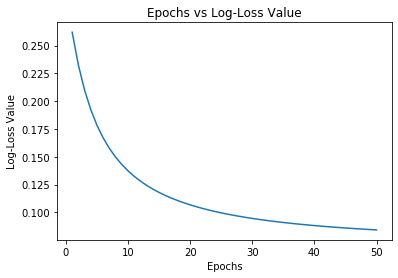

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
ep=np.arange(1,epochs+1)
plt.plot(ep,tr_loss)
plt.xlabel('Epochs')
plt.ylabel('Log-Loss Value')
plt.title('Epochs vs Log-Loss Value')

In [95]:
fcv_te = clf.decision_function(x_test)
p_y_equals_1=[]
for x_q in fcv_te:
    p_y_equals_1.append(1/(1+np.exp(-(w*x_q+b))))
print(p_y_equals_1)

[0.8740534932885753, 0.8534971383163575, 0.713561948025585, 0.9621436675986351, 0.98694408675435, 0.2991709026398438, 0.1433890834945624, 0.9019136812021811, 0.9913274158113468, 0.48212141048254425, 0.0666322569854786, 0.9820148642952545, 0.7289911880044013, 0.6913550983278385, 0.7792520598191286, 0.13406623213976157, 0.9784131055101604, 0.9632650716689813, 0.9653803569373975, 0.8941217950218892, 0.9293378412118658, 0.9922328596060993, 0.06799443996172297, 0.12839987567317687, 0.9640842418779402, 0.9773450911665355, 0.992183931226657, 0.8058658985594407, 0.7992916468589124, 0.25179766466385506, 0.9559939009085857, 0.9852111427923265, 0.9929093874194274, 0.9805969544989921, 0.13719471762761754, 0.5247153139656032, 0.5063298775078264, 0.9401642928497342, 0.36284962163293377, 0.18274744040677735, 0.9848130730554776, 0.5144818390328983, 0.46333906588443396, 0.5269689710178578, 0.9732012875929927, 0.10672920224980326, 0.9739757185100472, 0.9872659141117596, 0.2047604122121281, 0.10688475850